<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_2_numpy_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Basics of NumPy Arrays

##NumPy Array Attributes

In [0]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # One-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # Three-dimensional array

In [2]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


In [3]:
print("dtype:", x3.dtype)

dtype: int64


In [4]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


##Array Indexing: Accessing Single Elements

In [5]:
x1

array([5, 0, 3, 3, 7, 9])

In [6]:
x1[0]

5

In [7]:
x1[4]

7

In [8]:
x1[-1]

9

In [9]:
x1[-2]

7

In [10]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [11]:
x2[0, 0]

3

In [12]:
x2[2, 0]

1

In [13]:
x2[2, -1]

7

In [14]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [15]:
x1[0] = 3.14159 # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

##Array Slicing: Accessing Subarrays

1) якщо ми заслайсимо підмасив, то не буде відбуватись копіювання

In [193]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x[1:, 2:4]
print("Sliced array:")
print(y)

y[0, 0] = 123

print("X after setting y[0,0] = 123")
print(x)

print("Y after setting y[0,0] = 123")
print(y)

Input array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Sliced array:
[[ 7  8]
 [12 13]]
X after setting y[0,0] = 123
[[  0   1   2   3   4]
 [  5   6 123   8   9]
 [ 10  11  12  13  14]]
Y after setting y[0,0] = 123
[[123   8]
 [ 12  13]]


2) flatten() і ravel()

In [194]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.flatten()
print("Flattened array:")
print(y)

z = x.ravel()
print("Raveled array:")
print(z)

y[0] = 123
z[1] = 987

print("X:")
print(x)
print("Y:")
print(y)
print("Z:")
print(z)

Input array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Flattened array:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Raveled array:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
X:
[[  0 987   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]
Y:
[123   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
Z:
[  0 987   2   3   4   5   6   7   8   9  10  11  12  13  14]


3) transpose (теж без копіювання, наскільки я пам'ятаю)

In [196]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.transpose(0, 1)
print("After setting axes order to (0, 1) nothing should be changed:")
print(y)

z = x.transpose(1, 0)
print("After setting axes order to (1, 0) we get transposed array:")
print(z)

Input array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
After setting axes order to (0, 1) nothing should be changed:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
After setting axes order to (1, 0) we get transposed array:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [202]:
x = np.arange(2 * 3 * 2 * 3).reshape(2, 3, 2, 3)
print("Input array:")
print(x)

y = x.transpose(2, 0, 1, 3)
print("After setting axes order to (2, 0, 1, 3):")
print(y)

print("Comparing x[1, 2, 0, 2] and y[0, 1, 2, 2]:")
print(x[1, 2, 0, 2] == y[0, 1, 2, 2])

Input array:
[[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]

  [[12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]]

  [[24 25 26]
   [27 28 29]]

  [[30 31 32]
   [33 34 35]]]]
After setting axes order to (2, 0, 1, 3):
[[[[ 0  1  2]
   [ 6  7  8]
   [12 13 14]]

  [[18 19 20]
   [24 25 26]
   [30 31 32]]]


 [[[ 3  4  5]
   [ 9 10 11]
   [15 16 17]]

  [[21 22 23]
   [27 28 29]
   [33 34 35]]]]
Comparing x[1, 2, 0, 2] and y[0, 1, 2, 2]:
True


In [203]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.T
print("In case of 2-dimentional array we can use np.ndarray.T method for transposing:")
print(y)

Input array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
In case of 2-dimentional array we can use np.ndarray.T method for transposing:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [204]:
x = np.arange(3 * 5).reshape(3, 5)
print("Input array:")
print(x)

y = x.transpose(1, 0)
y[:] = 500

print("X after setting all values of transposed array to 500:")
print(x)

print("Y after setting all values of transposed array to 500:")
print(y)

Input array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
X after setting all values of transposed array to 500:
[[500 500 500 500 500]
 [500 500 500 500 500]
 [500 500 500 500 500]]
Y after setting all values of transposed array to 500:
[[500 500 500]
 [500 500 500]
 [500 500 500]
 [500 500 500]
 [500 500 500]]


4) там, де бродкастінг я би дав приклад з більшою кількість осей і звернув увагу на те, що самий надійний варіант бродкастінгу -- це руками засетити розмірність вісі в 1 (по-суті помітити вісь, по якій буде вестись копіювання)

In [210]:
a = np.arange(2 * 3 * 4).reshape(2, 3, 4)

b1 = a.reshape(1, 2, 1, 3, 4)
b2 = (a * 1000).reshape(2, 1, 3, 1 ,4)

print("b1 shape:", b1.shape)
print("b2 shape:", b2.shape)
print("b1+b2 shape:", (b1+b2).shape)

b1 shape: (1, 2, 1, 3, 4)
b2 shape: (2, 1, 3, 1, 4)
b1+b2 shape: (2, 2, 3, 3, 4)


5) можна приклад взяття чисельної похідної вліво/вправо навести:
(x[1:] - x[:-1]) / dt

In [211]:
x = np.arange(3 * 4).reshape(3, 4)**2
dt0 = 1e-5
dt1 = 1e-5

print("Input x:")
print(x)

print("dx/dt0 (partial over axis=0):")
print((x[1:]-x[:-1]) / dt0)

print("dx/dt1 (partial over axis=1):")
print((x[:, 1:]-x[:, :-1]) / dt1)

Input x:
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]]
dx/dt0 (partial over axis=0):
[[1600000. 2400000. 3200000. 4000000.]
 [4800000. 5600000. 6400000. 7200000.]]
dx/dt1 (partial over axis=1):
[[ 100000.  300000.  500000.]
 [ 900000. 1100000. 1300000.]
 [1700000. 1900000. 2100000.]]


In [16]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
x[:5] # first five elements

array([0, 1, 2, 3, 4])

In [18]:
x[5:] # elements after index 5

array([5, 6, 7, 8, 9])

In [19]:
x[4:7] # middle subarray

array([4, 5, 6])

In [20]:
x[::2] # every other element

array([0, 2, 4, 6, 8])

In [21]:
x[1::2] # every other element, starting at index 1

array([1, 3, 5, 7, 9])

In [22]:
x[::-1] # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [23]:
x[5::-2] # reversed every other from index 5

array([5, 3, 1])

In [24]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [25]:
x2[:2, :3] # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [26]:
x2[:3, ::2] # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [27]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

In [28]:
print(x2[:, 0]) # first column of x2

[12  7  1]


In [29]:
print(x2[0, :]) # first row of x2

[12  5  2  4]


In [30]:
print(x2[0]) # equivalent to x2[0, :]

[12  5  2  4]


In [31]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [32]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


In [33]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [34]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[12  5]
 [ 7  6]]


In [35]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [36]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


##Reshaping of Arrays

In [37]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [38]:
x = np.array([1, 2, 3])
# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [39]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [40]:
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [41]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

##Array Concatenation and Splitting

In [42]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [43]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


In [44]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [45]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [46]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [47]:
# horizontally stack the arrays
y = np.array([[99], [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

In [48]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


In [49]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [50]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [51]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


#Computation on NumPy Arrays: Universal Functions

##The Slowness of Loops

In [52]:
import numpy as np
np.random.seed(0)


def compute_reciprocals(values):
  output = np.empty(len(values))
  for i in range(len(values)):
    output[i] = 1.0 / values[i]
  return output


values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [53]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 3: 1.9 s per loop


##Introducing UFuncs

In [54]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [55]:
%timeit (1.0 / big_array)

100 loops, best of 3: 3.73 ms per loop


In [56]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [57]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

##Exploring NumPy’s UFuncs

In [58]:
x = np.arange(4)
print("x =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2) # floor division

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [59]:
print("-x = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2 = ", x % 2)

-x =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2 =  [0 1 0 1]


In [60]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [61]:
np.add(x, 2)

array([2, 3, 4, 5])

In [62]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)
np.absolute(x)
np.abs(x)

array([2, 1, 0, 1, 2])

In [63]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

In [64]:
theta = np.linspace(0, np.pi, 3)
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [65]:
x = [-1, 0, 1]
print("x = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [66]:
x = [1, 2, 3]
print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


In [67]:
x = [1, 2, 4, 10]
print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [68]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


In [69]:
from scipy import special
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


In [70]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x) =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


##Advanced Ufunc Features

In [71]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [72]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [73]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [74]:
np.multiply.reduce(x)

120

In [75]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [76]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [77]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

#Aggregations: Min, Max, and Everything in Between

##Summing the Values in an Array

In [78]:
import numpy as np
L = np.random.random(100)
sum(L)

50.461758453195614

In [79]:
np.sum(L)

50.46175845319564

In [80]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 94 ms per loop
1000 loops, best of 3: 416 µs per loop


##Minimum and Maximum

In [81]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [82]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [83]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 63.8 ms per loop
1000 loops, best of 3: 452 µs per loop


In [84]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


In [85]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


In [86]:
M.sum()

5.1136763453287335

In [87]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

In [88]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

#Example: What Is the Average Weight of US Cars?

In [89]:
import numpy as np
from vega_datasets import data
data.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

In [90]:
d_cars = data.cars()
d_cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [91]:
d_weights = np.array(d_cars['Weight_in_lbs'])
print(d_weights)

[3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 3090 4142 4034 4166
 3850 3563 3609 3353 3761 3086 2372 2833 2774 2587 2130 1835 2672 2430
 2375 2234 2648 4615 4376 4382 4732 2130 2264 2228 2046 1978 2634 3439
 3329 3302 3288 4209 4464 4154 4096 4955 4746 5140 2962 2408 3282 3139
 2220 2123 2074 2065 1773 1613 1834 1955 2278 2126 2254 2408 2226 4274
 4385 4135 4129 3672 4633 4502 4456 4422 2330 3892 4098 4294 4077 2933
 2511 2979 2189 2395 2288 2506 2164 2100 4100 3672 3988 4042 3777 4952
 4464 4363 4237 4735 4951 3821 3121 3278 2945 3021 2904 1950 4997 4906
 4654 4499 2789 2279 2401 2379 2124 2310 2472 2265 4082 4278 1867 2158
 2582 2868 3399 2660 2807 3664 3102 2875 2901 3336 1950 2451 1836 2542
 3781 3632 3613 4141 4699 4457 4638 4257 2219 1963 2300 1649 2003 2125
 2108 2246 2489 2391 2000 3264 3459 3432 3158 4668 4440 4498 4657 3907
 3897 3730 3785 3039 3221 3169 2171 2639 2914 2592 2702 2223 2545 2984
 1937 3211 2694 2957 2945 2671 1795 2464 2220 2572 2255 2202 4215 4190
 3962 

In [92]:
print("Mean weight: ", d_weights.mean())
print("Standard deviation:", d_weights.std())
print("Minimum weight: ", d_weights.min())
print("Maximum weight: ", d_weights.max())

Mean weight:  2979.4137931034484
Standard deviation: 845.9605763601298
Minimum weight:  1613
Maximum weight:  5140


In [93]:
print("25th percentile: ", np.percentile(d_weights, 25))
print("Median: ", np.median(d_weights))
print("75th percentile: ", np.percentile(d_weights, 75))

25th percentile:  2226.5
Median:  2822.5
75th percentile:  3618.25


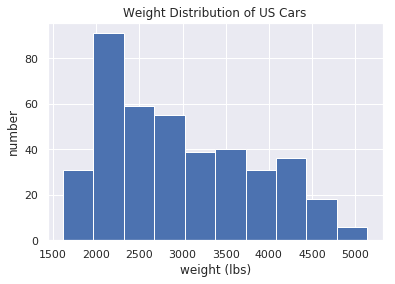

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style
plt.hist(d_weights)
plt.title('Weight Distribution of US Cars')
plt.xlabel('weight (lbs)')
plt.ylabel('number');

#Computation on Arrays: Broadcasting

##Introducing Broadcasting

In [95]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [96]:
a + 5

array([5, 6, 7])

In [97]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [98]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [99]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##Rules of Broadcasting

*   Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.
*   Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.
*  Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.



In [100]:
M = np.ones((2, 3))
a = np.arange(3)
print("M = ", M)
print("a = ", a)
M + a

M =  [[1. 1. 1.]
 [1. 1. 1.]]
a =  [0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.]])

In [101]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [102]:
M = np.ones((3, 2))
a = np.arange(3)
print("ERROR SHOULD BE GENERATED")
M + a

ERROR SHOULD BE GENERATED


ValueError: ignored

In [103]:
a[:, np.newaxis].shape
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [104]:
np.logaddexp(M, a[:, np.newaxis]) # broadcasting works with many other functions

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

##Broadcasting in Practice

In [0]:
X = np.random.random((10, 3))

In [106]:
Xmean = X.mean(0)
Xmean

array([0.49831076, 0.50193438, 0.46752888])

In [107]:
X_centered = X - Xmean
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

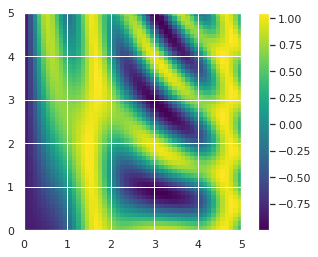

In [108]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
cmap='viridis')
plt.colorbar();

#Comparisons, Masks, and Boolean Logic

##Example: Obesity Rate

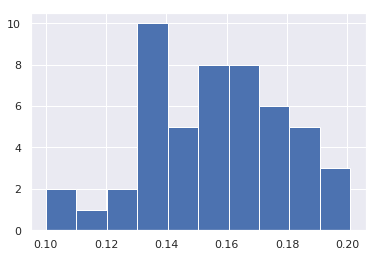

In [109]:
import numpy as np
from vega_datasets import data

d_obesity = data.obesity()
d_rate = np.array(d_obesity['rate'])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(d_rate, 10);

##Comparison Operators as ufuncs

In [110]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
print(x)
print(x < 3)  # less than
print(x > 3)  # greater than
print(x <= 3) # less than or equal
print(x == 3) # equal 
print(x != 3) # not equal
print(x >= 3) # greater than or equal 
print((2 * x) == (x ** 2))

[1 2 3 4 5]
[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True False False]
[ True  True False  True  True]
[False False  True  True  True]
[False  True False False False]


In [111]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [112]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

##Working with Boolean Arrays

In [113]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [114]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [115]:
np.sum(x < 6)

8

In [116]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [117]:
# are there any values greater than 8?
np.any(x > 8)

True

In [118]:
# are there any values less than zero?
np.any(x < 0)

False

In [119]:
# are all values less than 10?
np.all(x < 10)

True

In [120]:
# are all values equal to 6?
 np.all(x == 6)

False

In [121]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [122]:
import numpy as np
from vega_datasets import data

d_obesity = data.obesity()
d_rate = np.array(d_obesity['rate'])

print(np.sum((d_rate > 0.1) & (d_rate < 1.0)))
print(np.sum(~( (d_rate <= 0.1) | (d_rate >= 1) )))

49
49


In [123]:
print("Number states without obesity: ", np.sum(d_rate == 0))
print("Number states with obesity: ", np.sum(d_rate != 0))
print("States with more than 0.15 obesity rate:", np.sum(d_rate > 0.15))
print("States with < 0.15 obesity rate:", np.sum((d_rate > 0) & (d_rate < 0.15)))

Number states without obesity:  0
Number states with obesity:  50
States with more than 0.15 obesity rate: 30
States with < 0.15 obesity rate: 20


##Boolean Arrays as Masks

In [124]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [125]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [126]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [127]:
import numpy as np
from vega_datasets import data

d_cars = data.cars()
d_cars.head()
d_weights = np.array(d_cars['Weight_in_lbs'])
d_cylinders = np.array(d_cars['Cylinders'])
d_power = np.array(d_cars['Horsepower'])

d_heavy = (d_weights > 2500)
d_four_cylinders = (d_cylinders == 4)

# Nan values are present! Use special form of median and max
print("Median power of heavy cars (horsepower): ",
 np.nanmedian(d_power[d_heavy]))
print("Median power of four-cylinder cars (horsepower): ",
 np.nanmedian(d_power[d_four_cylinders]))
print("Maximum power of heavy cars (horsepower): ",
 np.nanmax(d_power[d_heavy]))
print("Median power of non-heavy four-cylinder cars (horsepower):",
 np.nanmedian(d_power[d_four_cylinders & ~d_heavy]))

Median power of heavy cars (horsepower):  110.0
Median power of four-cylinder cars (horsepower):  78.0
Maximum power of heavy cars (horsepower):  230.0
Median power of non-heavy four-cylinder cars (horsepower): 71.0


In [128]:
bool(42), bool(0)

(True, False)

In [129]:
bool(42 and 0)

False

In [130]:
bool(42 or 0)

True

In [131]:
bin(42), bin(59)

('0b101010', '0b111011')

In [132]:
bin(42 & 59)

'0b101010'

In [133]:
bin(42 | 59)

'0b111011'

In [134]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [135]:
print("ERROR SHOULD BE GENERATED")
A or B

ERROR SHOULD BE GENERATED


ValueError: ignored

In [136]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [137]:
print("ERROR SHOULD BE GENERATED")
(x > 4) and (x < 8)

ERROR SHOULD BE GENERATED


ValueError: ignored

#Fancy Indexing

##Exploring Fancy Indexing

In [138]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [139]:
 [x[3], x[7], x[2]]

[71, 86, 14]

In [140]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [141]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [142]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [143]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

**Note:** fancy indexing follows broadcasting rules

In [144]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [145]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

##Combined Indexing

In [146]:
import numpy as np
rand = np.random.RandomState(42)

X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [147]:
X[2, [2, 0, 1]] #  fancy and simple indices

array([10,  8,  9])

In [148]:
X[1:, [2, 0, 1]] # fancy indexing with slicing

array([[ 6,  4,  5],
       [10,  8,  9]])

In [149]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask] # fancy indexing with masking

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

##Example: Selecting Random Points

In [150]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

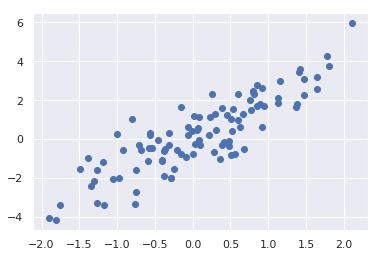

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [152]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([22, 34, 30, 40, 27, 12, 65,  5, 54, 74, 78, 96, 70, 18, 72, 89, 29,
       45, 36, 88])

In [153]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

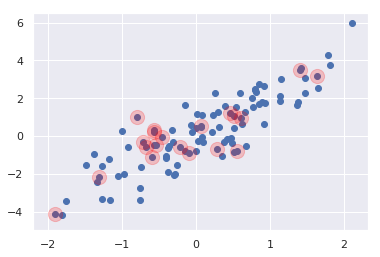

In [154]:
plt.scatter(X[:, 0], X[:, 1], alpha=1.0)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='red', s=200, alpha=0.2);

##Modifying Values with Fancy Indexing

In [155]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [156]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [157]:
x = np.zeros(10)
x[[0, 0]] = [4, 6] # note: ~ x[0] = 4, followed by x[0] = 6
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [158]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1 # note: x[i] += 1 ~ x[i] = x[i] + 1, NO ACCUMULATION
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [159]:
x = np.zeros(10)
np.add.at(x, i, 1) # if accumulation is needed
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


##Example: Binning Data

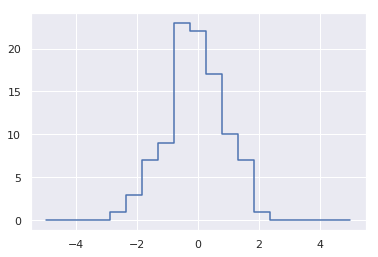

In [160]:
np.random.seed(42)
x = np.random.randn(100)
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)
# plot the results
plt.plot(bins, counts, linestyle='steps');

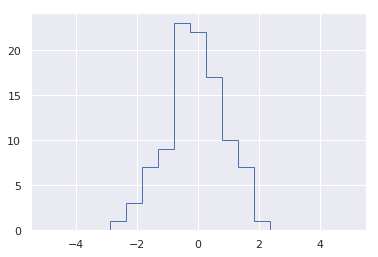

In [161]:
plt.hist(x, bins, histtype='step'); # standard way

In [162]:
# small size
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
The slowest run took 8.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 24.5 µs per loop
Custom routine:
The slowest run took 5.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.1 µs per loop


In [163]:
# large size
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 84.8 ms per loop
Custom routine:
10 loops, best of 3: 127 ms per loop


#Sorting Arrays

In [164]:
import numpy as np

def selection_sort(x):
  for i in range(len(x)):
    swap = i + np.argmin(x[i:])
    (x[i], x[swap]) = (x[swap], x[i])
  return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [165]:
# drug addict's sort
def bogosort(x):
  while np.any(x[:-1] > x[1:]):
    np.random.shuffle(x)
  return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

##Fast Sorting in NumPy: np.sort and np.argsort

In [166]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [167]:
x.sort()
print(x)

[1 2 3 4 5]


In [168]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print("indices", i)
x[i]

indices [1 0 3 2 4]


array([1, 2, 3, 4, 5])

In [169]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [170]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [171]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

##Partial Sorts: Partitioning

In [172]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3) # 3 smallest values in the array

array([2, 1, 3, 4, 6, 5, 7])

In [173]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

##Example: k-Nearest Neighbors

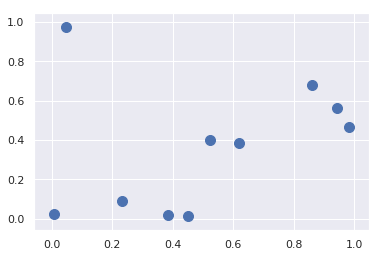

In [174]:
X = rand.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [175]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq.diagonal() # check that each point has 0 distance to itself

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [176]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


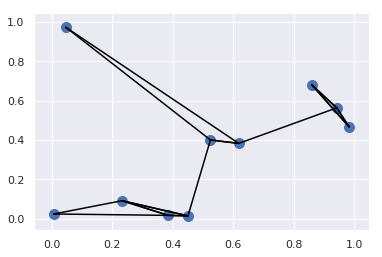

In [177]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
  for j in nearest_partition[i, :K+1]:
    # plot a line from X[i] to X[j]
    # use some zip magic to make it happen:
    plt.plot(*zip(X[j], X[i]), color='black')

#Structured Data: NumPy’s Structured Arrays

In [0]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [179]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [180]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [181]:
# Get all names
print(data['name'])
# Get first row of data
print(data[0])
# Get the name from the last row
print(data[-1]['name'])
print(data[data['age'] < 30]['name'])

['Alice' 'Bob' 'Cathy' 'Doug']
('Alice', 25, 55.)
Doug
['Alice' 'Doug']


##Creating Structured Arrays

In [182]:
np.dtype({'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [183]:
np.dtype({'names':('name', 'age', 'weight'),
'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i8'), ('weight', '<f4')])

In [184]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [185]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

##More Advanced Compound Types

In [186]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


##RecordArrays: Structured Arrays with a Twist

In [187]:
print(data['age'])
data_rec = data.view(np.recarray)
print(data_rec.age) # fields can be accessed as attributes

[25 45 37 19]
[25 45 37 19]


In [188]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

The slowest run took 52.16 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 177 ns per loop
The slowest run took 7.39 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.2 µs per loop
The slowest run took 6.15 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.6 µs per loop
